# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 36kB/s  eta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

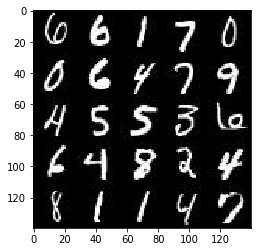

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

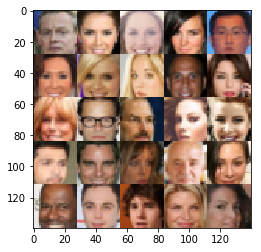

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    #print(image_width, image_height, image_channels)

    real_inputs_placeholder = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    z_inputs_placeholder = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate_placeholder = tf.placeholder(tf.float32, name='lr')

    return real_inputs_placeholder, z_inputs_placeholder, learning_rate_placeholder


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 832, in start\n    self._run_callback(self._callbacks.popleft())', 'File

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        alpha = 0.2
        
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 56, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x56
        
        x2 = tf.layers.conv2d(relu1, 112, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x112
        
        x3 = tf.layers.conv2d(relu2, 224, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x224

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*224))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits

    return logits, out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse= not is_train):
        alpha = 0.2
        
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*256)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x256 now
        '''
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 4x4x256 now
        '''
        x3 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 14x14x128 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        # 28x28x3 now
        
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,
                                                                         labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                                         labels=tf.zeros_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                                         labels=tf.ones_like(d_model_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, image_width, image_height, image_channels = data_shape
    
    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    
    '''
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    lr = tf.placeholder(tf.float32, name='lr')
    
    print(input_real.shape)
    print(input_real.dtype)
    '''
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    saver=tf.train.Saver()
    batch_num = 0
    losses=[]
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                batch_num += 1
                
                batch_images*=2
                
                batch_z  = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                if batch_num % 10 == 0:
                    
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
            
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                      "Discriminator Loss: {:.4f}...".format(train_loss_d),
                      "Generator Loss: {:.4f}".format(train_loss_g))    

                    losses.append((train_loss_d, train_loss_g))
                
                if batch_num % 100 == 0:
                    show_generator_output(sess, 20, input_z, image_channels, data_image_mode)

        saver.save(sess, './generator.ckpt')
    
    return losses

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.2572... Generator Loss: 11.9661
Epoch 1/2... Discriminator Loss: 2.8039... Generator Loss: 0.4904
Epoch 1/2... Discriminator Loss: 1.2919... Generator Loss: 4.3387
Epoch 1/2... Discriminator Loss: 0.7832... Generator Loss: 2.6046
Epoch 1/2... Discriminator Loss: 0.8562... Generator Loss: 2.7523
Epoch 1/2... Discriminator Loss: 0.8449... Generator Loss: 1.3590
Epoch 1/2... Discriminator Loss: 1.5528... Generator Loss: 0.3710
Epoch 1/2... Discriminator Loss: 1.6175... Generator Loss: 0.3647
Epoch 1/2... Discriminator Loss: 0.9822... Generator Loss: 1.7638
Epoch 1/2... Discriminator Loss: 1.0672... Generator Loss: 0.8626


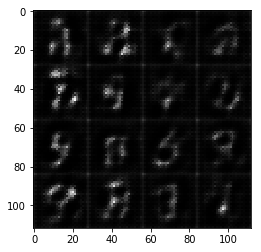

Epoch 1/2... Discriminator Loss: 1.3281... Generator Loss: 1.2644
Epoch 1/2... Discriminator Loss: 1.2429... Generator Loss: 1.5333
Epoch 1/2... Discriminator Loss: 1.3717... Generator Loss: 0.4300
Epoch 1/2... Discriminator Loss: 1.0945... Generator Loss: 0.6605
Epoch 1/2... Discriminator Loss: 1.0483... Generator Loss: 0.9451
Epoch 1/2... Discriminator Loss: 1.1625... Generator Loss: 1.7717
Epoch 1/2... Discriminator Loss: 1.2021... Generator Loss: 0.5332
Epoch 1/2... Discriminator Loss: 1.0110... Generator Loss: 1.0993
Epoch 1/2... Discriminator Loss: 1.3249... Generator Loss: 0.4041
Epoch 1/2... Discriminator Loss: 0.9789... Generator Loss: 1.9792


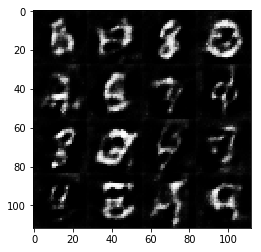

Epoch 1/2... Discriminator Loss: 1.0366... Generator Loss: 0.6521
Epoch 1/2... Discriminator Loss: 0.9826... Generator Loss: 0.7625
Epoch 1/2... Discriminator Loss: 1.3034... Generator Loss: 2.3515
Epoch 1/2... Discriminator Loss: 0.8733... Generator Loss: 1.1237
Epoch 1/2... Discriminator Loss: 0.9204... Generator Loss: 0.7792
Epoch 1/2... Discriminator Loss: 0.9510... Generator Loss: 0.7770
Epoch 1/2... Discriminator Loss: 1.0255... Generator Loss: 1.2053
Epoch 1/2... Discriminator Loss: 0.9735... Generator Loss: 1.1287
Epoch 1/2... Discriminator Loss: 1.0609... Generator Loss: 1.4967
Epoch 1/2... Discriminator Loss: 1.0914... Generator Loss: 0.6237


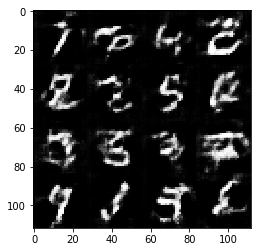

Epoch 1/2... Discriminator Loss: 1.0132... Generator Loss: 0.8716
Epoch 1/2... Discriminator Loss: 1.1263... Generator Loss: 0.6011
Epoch 1/2... Discriminator Loss: 1.3542... Generator Loss: 0.4267
Epoch 1/2... Discriminator Loss: 0.8982... Generator Loss: 1.2770
Epoch 1/2... Discriminator Loss: 2.1845... Generator Loss: 3.5882
Epoch 1/2... Discriminator Loss: 1.0233... Generator Loss: 0.9387
Epoch 1/2... Discriminator Loss: 0.9136... Generator Loss: 1.2718
Epoch 1/2... Discriminator Loss: 0.9646... Generator Loss: 0.9906
Epoch 1/2... Discriminator Loss: 1.1902... Generator Loss: 0.5322
Epoch 1/2... Discriminator Loss: 0.8518... Generator Loss: 1.4067


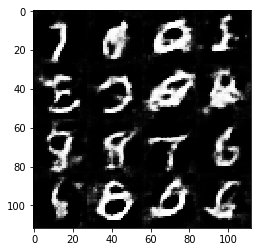

Epoch 1/2... Discriminator Loss: 0.8549... Generator Loss: 1.3535
Epoch 1/2... Discriminator Loss: 0.9547... Generator Loss: 1.0713
Epoch 1/2... Discriminator Loss: 0.9706... Generator Loss: 1.3174
Epoch 1/2... Discriminator Loss: 1.3442... Generator Loss: 0.4516
Epoch 1/2... Discriminator Loss: 1.1782... Generator Loss: 0.5735
Epoch 1/2... Discriminator Loss: 1.4713... Generator Loss: 0.3768
Epoch 1/2... Discriminator Loss: 1.2794... Generator Loss: 0.4681
Epoch 1/2... Discriminator Loss: 1.1876... Generator Loss: 2.0617
Epoch 1/2... Discriminator Loss: 0.9502... Generator Loss: 0.7215
Epoch 1/2... Discriminator Loss: 0.9084... Generator Loss: 0.8909


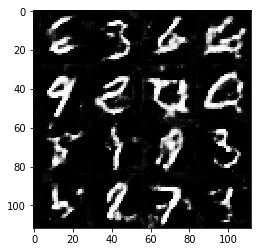

Epoch 1/2... Discriminator Loss: 1.4231... Generator Loss: 0.3994
Epoch 1/2... Discriminator Loss: 0.8110... Generator Loss: 1.2397
Epoch 1/2... Discriminator Loss: 1.3701... Generator Loss: 0.3865
Epoch 1/2... Discriminator Loss: 0.8306... Generator Loss: 1.7743
Epoch 1/2... Discriminator Loss: 0.9275... Generator Loss: 1.1032
Epoch 1/2... Discriminator Loss: 1.0529... Generator Loss: 0.6891
Epoch 1/2... Discriminator Loss: 0.7408... Generator Loss: 1.3664
Epoch 1/2... Discriminator Loss: 1.1953... Generator Loss: 0.6047
Epoch 1/2... Discriminator Loss: 0.8576... Generator Loss: 1.1051
Epoch 1/2... Discriminator Loss: 0.8017... Generator Loss: 1.3426


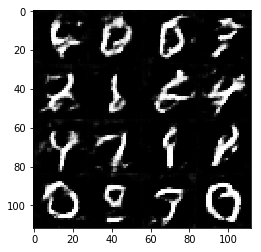

Epoch 2/2... Discriminator Loss: 1.5937... Generator Loss: 0.3088
Epoch 2/2... Discriminator Loss: 0.8516... Generator Loss: 0.9923
Epoch 2/2... Discriminator Loss: 0.8350... Generator Loss: 1.4339
Epoch 2/2... Discriminator Loss: 1.7076... Generator Loss: 2.5401
Epoch 2/2... Discriminator Loss: 0.8149... Generator Loss: 1.2164
Epoch 2/2... Discriminator Loss: 0.8027... Generator Loss: 1.0205
Epoch 2/2... Discriminator Loss: 0.7238... Generator Loss: 1.1166
Epoch 2/2... Discriminator Loss: 1.0177... Generator Loss: 0.6572
Epoch 2/2... Discriminator Loss: 0.8897... Generator Loss: 0.9151
Epoch 2/2... Discriminator Loss: 0.9038... Generator Loss: 0.7506


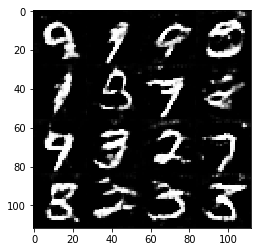

Epoch 2/2... Discriminator Loss: 0.7934... Generator Loss: 1.7469
Epoch 2/2... Discriminator Loss: 1.5227... Generator Loss: 3.9836
Epoch 2/2... Discriminator Loss: 0.9918... Generator Loss: 0.7428
Epoch 2/2... Discriminator Loss: 0.6073... Generator Loss: 1.2690
Epoch 2/2... Discriminator Loss: 0.9391... Generator Loss: 0.6657
Epoch 2/2... Discriminator Loss: 1.1197... Generator Loss: 0.7304
Epoch 2/2... Discriminator Loss: 0.8295... Generator Loss: 0.9174
Epoch 2/2... Discriminator Loss: 0.7276... Generator Loss: 1.6047
Epoch 2/2... Discriminator Loss: 0.6700... Generator Loss: 1.0739
Epoch 2/2... Discriminator Loss: 0.8246... Generator Loss: 0.8680


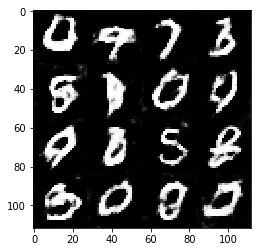

Epoch 2/2... Discriminator Loss: 0.9141... Generator Loss: 0.7109
Epoch 2/2... Discriminator Loss: 1.8285... Generator Loss: 0.3322
Epoch 2/2... Discriminator Loss: 1.0326... Generator Loss: 0.7160
Epoch 2/2... Discriminator Loss: 0.7201... Generator Loss: 1.6908
Epoch 2/2... Discriminator Loss: 0.9901... Generator Loss: 0.6828
Epoch 2/2... Discriminator Loss: 0.7643... Generator Loss: 1.1663
Epoch 2/2... Discriminator Loss: 0.7586... Generator Loss: 0.9006
Epoch 2/2... Discriminator Loss: 0.7467... Generator Loss: 0.8867
Epoch 2/2... Discriminator Loss: 0.4852... Generator Loss: 1.4938
Epoch 2/2... Discriminator Loss: 0.7607... Generator Loss: 1.7477


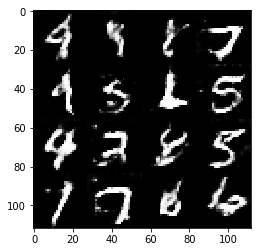

Epoch 2/2... Discriminator Loss: 1.9246... Generator Loss: 3.2482
Epoch 2/2... Discriminator Loss: 0.7473... Generator Loss: 0.9995
Epoch 2/2... Discriminator Loss: 1.9629... Generator Loss: 3.3412
Epoch 2/2... Discriminator Loss: 0.9676... Generator Loss: 0.8285
Epoch 2/2... Discriminator Loss: 1.0658... Generator Loss: 0.6178
Epoch 2/2... Discriminator Loss: 0.6546... Generator Loss: 2.0065
Epoch 2/2... Discriminator Loss: 0.7156... Generator Loss: 1.0009
Epoch 2/2... Discriminator Loss: 0.9039... Generator Loss: 0.7414
Epoch 2/2... Discriminator Loss: 0.6096... Generator Loss: 1.0476
Epoch 2/2... Discriminator Loss: 0.5140... Generator Loss: 1.3331


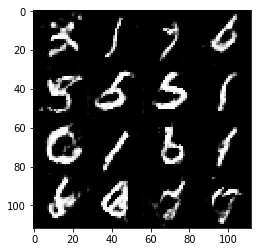

Epoch 2/2... Discriminator Loss: 2.0254... Generator Loss: 3.8173
Epoch 2/2... Discriminator Loss: 0.8785... Generator Loss: 0.9256
Epoch 2/2... Discriminator Loss: 0.9051... Generator Loss: 0.8763
Epoch 2/2... Discriminator Loss: 0.8586... Generator Loss: 1.3733
Epoch 2/2... Discriminator Loss: 0.6972... Generator Loss: 1.3092
Epoch 2/2... Discriminator Loss: 1.3174... Generator Loss: 0.4514
Epoch 2/2... Discriminator Loss: 0.9464... Generator Loss: 1.2285
Epoch 2/2... Discriminator Loss: 0.7745... Generator Loss: 1.1318
Epoch 2/2... Discriminator Loss: 1.2895... Generator Loss: 3.0321
Epoch 2/2... Discriminator Loss: 0.8246... Generator Loss: 0.8533


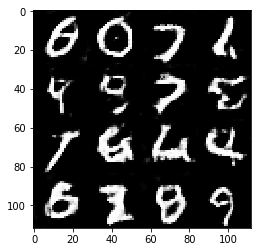

Epoch 2/2... Discriminator Loss: 0.8507... Generator Loss: 0.8230
Epoch 2/2... Discriminator Loss: 0.8020... Generator Loss: 0.7906
Epoch 2/2... Discriminator Loss: 0.6383... Generator Loss: 1.1800
Epoch 2/2... Discriminator Loss: 0.4468... Generator Loss: 1.4047
Epoch 2/2... Discriminator Loss: 0.7024... Generator Loss: 0.9585
Epoch 2/2... Discriminator Loss: 1.3450... Generator Loss: 0.4473
Epoch 2/2... Discriminator Loss: 0.4824... Generator Loss: 1.3973
Epoch 2/2... Discriminator Loss: 1.1007... Generator Loss: 0.6292
Epoch 2/2... Discriminator Loss: 0.7906... Generator Loss: 0.8545
Epoch 2/2... Discriminator Loss: 0.5577... Generator Loss: 1.1796


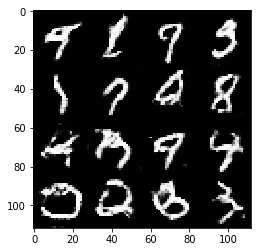

In [14]:
batch_size = 100
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.0793... Generator Loss: 11.2943
Epoch 1/1... Discriminator Loss: 0.9123... Generator Loss: 1.2031
Epoch 1/1... Discriminator Loss: 2.5594... Generator Loss: 0.3335
Epoch 1/1... Discriminator Loss: 1.0165... Generator Loss: 0.9259
Epoch 1/1... Discriminator Loss: 0.9879... Generator Loss: 0.7809
Epoch 1/1... Discriminator Loss: 1.2690... Generator Loss: 0.4990
Epoch 1/1... Discriminator Loss: 0.3964... Generator Loss: 3.0439
Epoch 1/1... Discriminator Loss: 1.5133... Generator Loss: 4.4089
Epoch 1/1... Discriminator Loss: 0.4207... Generator Loss: 2.3194
Epoch 1/1... Discriminator Loss: 0.8611... Generator Loss: 1.8685


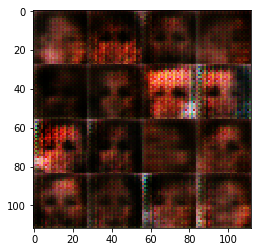

Epoch 1/1... Discriminator Loss: 2.6711... Generator Loss: 0.1785
Epoch 1/1... Discriminator Loss: 1.3031... Generator Loss: 1.0109
Epoch 1/1... Discriminator Loss: 2.2224... Generator Loss: 1.8158
Epoch 1/1... Discriminator Loss: 0.8856... Generator Loss: 1.1807
Epoch 1/1... Discriminator Loss: 2.2588... Generator Loss: 2.2185
Epoch 1/1... Discriminator Loss: 1.3940... Generator Loss: 0.7759
Epoch 1/1... Discriminator Loss: 1.1768... Generator Loss: 0.7255
Epoch 1/1... Discriminator Loss: 1.5353... Generator Loss: 0.4684
Epoch 1/1... Discriminator Loss: 1.3744... Generator Loss: 0.7343
Epoch 1/1... Discriminator Loss: 1.4211... Generator Loss: 0.5979


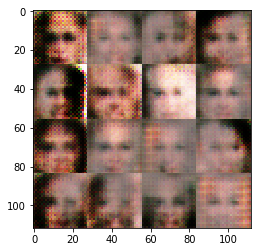

Epoch 1/1... Discriminator Loss: 1.3880... Generator Loss: 0.4894
Epoch 1/1... Discriminator Loss: 1.0672... Generator Loss: 0.7409
Epoch 1/1... Discriminator Loss: 1.2465... Generator Loss: 0.7232
Epoch 1/1... Discriminator Loss: 1.2501... Generator Loss: 0.7738
Epoch 1/1... Discriminator Loss: 1.4743... Generator Loss: 0.6671
Epoch 1/1... Discriminator Loss: 1.4490... Generator Loss: 0.6697
Epoch 1/1... Discriminator Loss: 1.3901... Generator Loss: 0.6729
Epoch 1/1... Discriminator Loss: 1.3786... Generator Loss: 0.7359
Epoch 1/1... Discriminator Loss: 1.3832... Generator Loss: 0.9809
Epoch 1/1... Discriminator Loss: 1.5956... Generator Loss: 0.3272


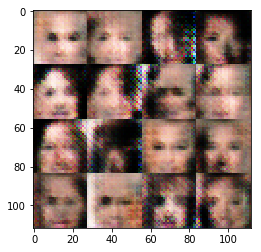

Epoch 1/1... Discriminator Loss: 1.3695... Generator Loss: 0.8019
Epoch 1/1... Discriminator Loss: 1.2349... Generator Loss: 0.6848
Epoch 1/1... Discriminator Loss: 1.3684... Generator Loss: 0.7690
Epoch 1/1... Discriminator Loss: 1.2591... Generator Loss: 0.7826
Epoch 1/1... Discriminator Loss: 1.3247... Generator Loss: 0.8494
Epoch 1/1... Discriminator Loss: 1.2486... Generator Loss: 0.5539
Epoch 1/1... Discriminator Loss: 1.4199... Generator Loss: 0.6609
Epoch 1/1... Discriminator Loss: 1.3577... Generator Loss: 0.7352
Epoch 1/1... Discriminator Loss: 1.3706... Generator Loss: 0.6966
Epoch 1/1... Discriminator Loss: 0.9899... Generator Loss: 1.3668


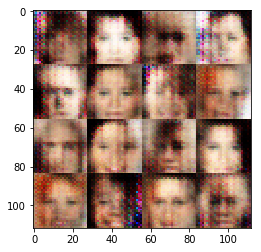

Epoch 1/1... Discriminator Loss: 1.6078... Generator Loss: 0.6170
Epoch 1/1... Discriminator Loss: 1.3588... Generator Loss: 0.8173
Epoch 1/1... Discriminator Loss: 1.4046... Generator Loss: 0.7360
Epoch 1/1... Discriminator Loss: 1.3346... Generator Loss: 0.7588
Epoch 1/1... Discriminator Loss: 1.2624... Generator Loss: 0.9484
Epoch 1/1... Discriminator Loss: 1.6629... Generator Loss: 0.6294
Epoch 1/1... Discriminator Loss: 1.3517... Generator Loss: 0.6865
Epoch 1/1... Discriminator Loss: 1.3883... Generator Loss: 0.7483
Epoch 1/1... Discriminator Loss: 1.2806... Generator Loss: 0.6866
Epoch 1/1... Discriminator Loss: 1.3220... Generator Loss: 0.7656


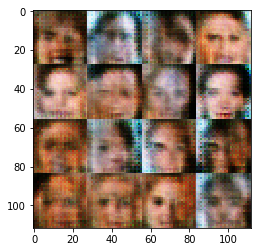

Epoch 1/1... Discriminator Loss: 1.2473... Generator Loss: 1.5559
Epoch 1/1... Discriminator Loss: 1.4569... Generator Loss: 0.9198
Epoch 1/1... Discriminator Loss: 1.3632... Generator Loss: 0.7541
Epoch 1/1... Discriminator Loss: 1.3089... Generator Loss: 0.6336
Epoch 1/1... Discriminator Loss: 1.5493... Generator Loss: 0.8103
Epoch 1/1... Discriminator Loss: 1.3204... Generator Loss: 0.8083
Epoch 1/1... Discriminator Loss: 1.3721... Generator Loss: 0.7633
Epoch 1/1... Discriminator Loss: 1.0230... Generator Loss: 1.2059
Epoch 1/1... Discriminator Loss: 1.6918... Generator Loss: 1.0038
Epoch 1/1... Discriminator Loss: 1.3043... Generator Loss: 0.8616


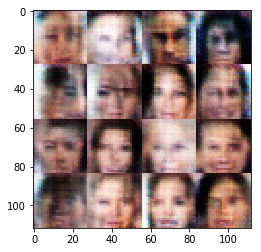

Epoch 1/1... Discriminator Loss: 1.3783... Generator Loss: 0.4826
Epoch 1/1... Discriminator Loss: 1.4524... Generator Loss: 0.7332
Epoch 1/1... Discriminator Loss: 1.1806... Generator Loss: 0.9340
Epoch 1/1... Discriminator Loss: 1.3791... Generator Loss: 0.6595
Epoch 1/1... Discriminator Loss: 1.1918... Generator Loss: 0.5483
Epoch 1/1... Discriminator Loss: 1.4193... Generator Loss: 0.7793
Epoch 1/1... Discriminator Loss: 1.2626... Generator Loss: 0.8924
Epoch 1/1... Discriminator Loss: 1.1760... Generator Loss: 0.8466
Epoch 1/1... Discriminator Loss: 1.3224... Generator Loss: 0.9383
Epoch 1/1... Discriminator Loss: 1.4030... Generator Loss: 0.4638


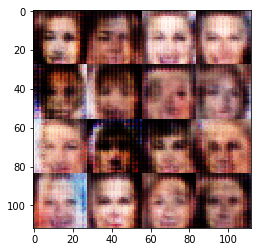

Epoch 1/1... Discriminator Loss: 1.1166... Generator Loss: 1.1444
Epoch 1/1... Discriminator Loss: 1.0522... Generator Loss: 0.7731
Epoch 1/1... Discriminator Loss: 0.9728... Generator Loss: 1.1186
Epoch 1/1... Discriminator Loss: 1.5594... Generator Loss: 0.3321
Epoch 1/1... Discriminator Loss: 0.9780... Generator Loss: 0.9213
Epoch 1/1... Discriminator Loss: 1.2588... Generator Loss: 1.0072
Epoch 1/1... Discriminator Loss: 1.0019... Generator Loss: 2.5088
Epoch 1/1... Discriminator Loss: 0.8000... Generator Loss: 0.9330
Epoch 1/1... Discriminator Loss: 1.3760... Generator Loss: 0.8563
Epoch 1/1... Discriminator Loss: 1.2356... Generator Loss: 0.7291


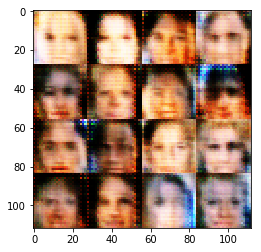

Epoch 1/1... Discriminator Loss: 1.3515... Generator Loss: 0.7837
Epoch 1/1... Discriminator Loss: 1.3672... Generator Loss: 0.7272
Epoch 1/1... Discriminator Loss: 1.5630... Generator Loss: 0.8099
Epoch 1/1... Discriminator Loss: 1.1721... Generator Loss: 0.8311
Epoch 1/1... Discriminator Loss: 1.5257... Generator Loss: 1.0763
Epoch 1/1... Discriminator Loss: 1.3201... Generator Loss: 0.5630
Epoch 1/1... Discriminator Loss: 1.1649... Generator Loss: 0.6008
Epoch 1/1... Discriminator Loss: 1.5555... Generator Loss: 0.3694
Epoch 1/1... Discriminator Loss: 1.1575... Generator Loss: 1.5142
Epoch 1/1... Discriminator Loss: 0.8199... Generator Loss: 1.1183


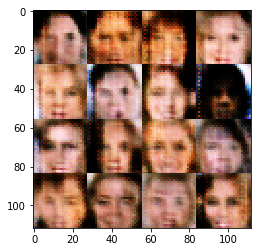

Epoch 1/1... Discriminator Loss: 2.1033... Generator Loss: 2.2334
Epoch 1/1... Discriminator Loss: 1.1988... Generator Loss: 0.6998
Epoch 1/1... Discriminator Loss: 0.4893... Generator Loss: 2.8529
Epoch 1/1... Discriminator Loss: 0.6699... Generator Loss: 1.6515
Epoch 1/1... Discriminator Loss: 1.3157... Generator Loss: 0.7485
Epoch 1/1... Discriminator Loss: 1.3383... Generator Loss: 0.7889
Epoch 1/1... Discriminator Loss: 1.2913... Generator Loss: 0.7158
Epoch 1/1... Discriminator Loss: 0.9814... Generator Loss: 1.2425
Epoch 1/1... Discriminator Loss: 1.4354... Generator Loss: 0.8496
Epoch 1/1... Discriminator Loss: 1.3353... Generator Loss: 0.6240


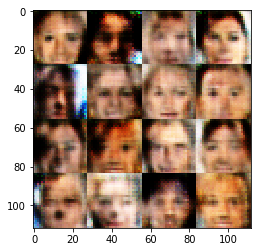

Epoch 1/1... Discriminator Loss: 1.5360... Generator Loss: 1.4544
Epoch 1/1... Discriminator Loss: 1.6626... Generator Loss: 1.6259
Epoch 1/1... Discriminator Loss: 1.2495... Generator Loss: 1.4265
Epoch 1/1... Discriminator Loss: 1.0908... Generator Loss: 0.8716
Epoch 1/1... Discriminator Loss: 0.6651... Generator Loss: 1.2496
Epoch 1/1... Discriminator Loss: 1.6160... Generator Loss: 1.4690
Epoch 1/1... Discriminator Loss: 1.2947... Generator Loss: 0.7090
Epoch 1/1... Discriminator Loss: 0.8506... Generator Loss: 0.9685
Epoch 1/1... Discriminator Loss: 3.3669... Generator Loss: 0.0472
Epoch 1/1... Discriminator Loss: 1.3604... Generator Loss: 0.5604


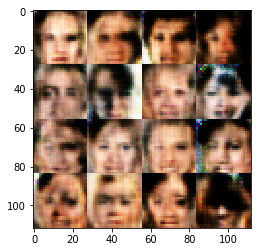

Epoch 1/1... Discriminator Loss: 1.3110... Generator Loss: 2.6320
Epoch 1/1... Discriminator Loss: 0.4647... Generator Loss: 2.2136
Epoch 1/1... Discriminator Loss: 1.1828... Generator Loss: 1.0569
Epoch 1/1... Discriminator Loss: 1.2585... Generator Loss: 0.7461
Epoch 1/1... Discriminator Loss: 1.1712... Generator Loss: 0.5729
Epoch 1/1... Discriminator Loss: 1.4196... Generator Loss: 0.4576
Epoch 1/1... Discriminator Loss: 0.9910... Generator Loss: 1.2201
Epoch 1/1... Discriminator Loss: 0.1741... Generator Loss: 2.7100
Epoch 1/1... Discriminator Loss: 1.1821... Generator Loss: 0.9649
Epoch 1/1... Discriminator Loss: 1.4285... Generator Loss: 0.6201


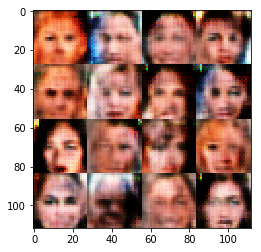

Epoch 1/1... Discriminator Loss: 1.2550... Generator Loss: 0.6742
Epoch 1/1... Discriminator Loss: 1.1604... Generator Loss: 0.4997
Epoch 1/1... Discriminator Loss: 1.6122... Generator Loss: 2.3244
Epoch 1/1... Discriminator Loss: 1.0626... Generator Loss: 2.1063
Epoch 1/1... Discriminator Loss: 1.9255... Generator Loss: 3.4293
Epoch 1/1... Discriminator Loss: 1.2278... Generator Loss: 0.5538
Epoch 1/1... Discriminator Loss: 1.5940... Generator Loss: 3.0952
Epoch 1/1... Discriminator Loss: 0.7140... Generator Loss: 1.2252
Epoch 1/1... Discriminator Loss: 0.9789... Generator Loss: 0.8715
Epoch 1/1... Discriminator Loss: 1.1936... Generator Loss: 0.5151


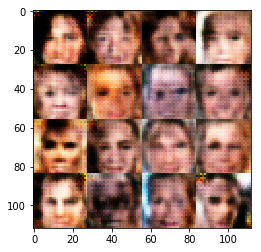

Epoch 1/1... Discriminator Loss: 1.1678... Generator Loss: 0.7890
Epoch 1/1... Discriminator Loss: 1.1206... Generator Loss: 0.5481
Epoch 1/1... Discriminator Loss: 1.2539... Generator Loss: 0.5305
Epoch 1/1... Discriminator Loss: 0.8265... Generator Loss: 0.8255
Epoch 1/1... Discriminator Loss: 1.3486... Generator Loss: 0.4236
Epoch 1/1... Discriminator Loss: 1.3741... Generator Loss: 0.4226
Epoch 1/1... Discriminator Loss: 0.7684... Generator Loss: 1.7513
Epoch 1/1... Discriminator Loss: 0.2175... Generator Loss: 2.5171
Epoch 1/1... Discriminator Loss: 1.7036... Generator Loss: 0.6124
Epoch 1/1... Discriminator Loss: 1.2465... Generator Loss: 1.2779


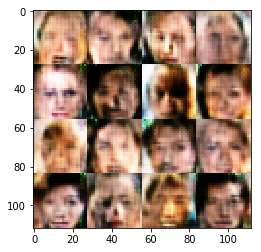

Epoch 1/1... Discriminator Loss: 1.4062... Generator Loss: 0.7110
Epoch 1/1... Discriminator Loss: 1.7110... Generator Loss: 1.6470
Epoch 1/1... Discriminator Loss: 1.3235... Generator Loss: 0.4696
Epoch 1/1... Discriminator Loss: 1.3525... Generator Loss: 0.5167
Epoch 1/1... Discriminator Loss: 1.2847... Generator Loss: 0.6809
Epoch 1/1... Discriminator Loss: 1.2569... Generator Loss: 0.9520
Epoch 1/1... Discriminator Loss: 1.3760... Generator Loss: 0.5394
Epoch 1/1... Discriminator Loss: 1.2542... Generator Loss: 0.5875
Epoch 1/1... Discriminator Loss: 1.0853... Generator Loss: 0.7820
Epoch 1/1... Discriminator Loss: 1.5250... Generator Loss: 0.5088


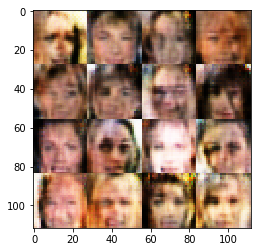

Epoch 1/1... Discriminator Loss: 1.1490... Generator Loss: 0.9555
Epoch 1/1... Discriminator Loss: 1.0856... Generator Loss: 0.8933
Epoch 1/1... Discriminator Loss: 1.3916... Generator Loss: 0.4158
Epoch 1/1... Discriminator Loss: 1.4957... Generator Loss: 1.4001
Epoch 1/1... Discriminator Loss: 1.1475... Generator Loss: 0.9051
Epoch 1/1... Discriminator Loss: 1.5317... Generator Loss: 0.6641
Epoch 1/1... Discriminator Loss: 0.9312... Generator Loss: 0.9315
Epoch 1/1... Discriminator Loss: 0.9676... Generator Loss: 1.2947
Epoch 1/1... Discriminator Loss: 0.9851... Generator Loss: 1.4565
Epoch 1/1... Discriminator Loss: 0.2604... Generator Loss: 3.8366


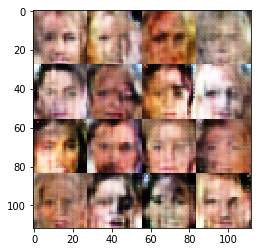

Epoch 1/1... Discriminator Loss: 1.4249... Generator Loss: 0.4397
Epoch 1/1... Discriminator Loss: 1.2195... Generator Loss: 0.8610
Epoch 1/1... Discriminator Loss: 0.8378... Generator Loss: 1.0284
Epoch 1/1... Discriminator Loss: 1.2390... Generator Loss: 1.2755
Epoch 1/1... Discriminator Loss: 1.9645... Generator Loss: 0.1999
Epoch 1/1... Discriminator Loss: 0.9535... Generator Loss: 0.9752
Epoch 1/1... Discriminator Loss: 0.4114... Generator Loss: 1.8217
Epoch 1/1... Discriminator Loss: 1.1482... Generator Loss: 0.5707
Epoch 1/1... Discriminator Loss: 2.3884... Generator Loss: 0.1379
Epoch 1/1... Discriminator Loss: 0.7230... Generator Loss: 1.1660


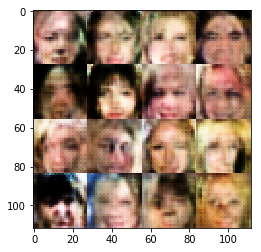

Epoch 1/1... Discriminator Loss: 0.7041... Generator Loss: 1.2510
Epoch 1/1... Discriminator Loss: 1.8632... Generator Loss: 2.5260
Epoch 1/1... Discriminator Loss: 1.1773... Generator Loss: 0.9027
Epoch 1/1... Discriminator Loss: 0.7551... Generator Loss: 1.9475
Epoch 1/1... Discriminator Loss: 1.3840... Generator Loss: 0.5773
Epoch 1/1... Discriminator Loss: 0.8041... Generator Loss: 1.9518
Epoch 1/1... Discriminator Loss: 0.8900... Generator Loss: 1.1188
Epoch 1/1... Discriminator Loss: 1.4226... Generator Loss: 0.3652
Epoch 1/1... Discriminator Loss: 1.1014... Generator Loss: 0.9680
Epoch 1/1... Discriminator Loss: 0.4833... Generator Loss: 1.2763


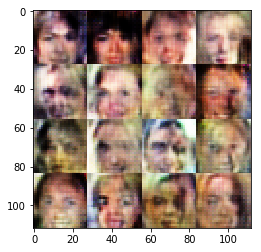

Epoch 1/1... Discriminator Loss: 0.2403... Generator Loss: 2.2537
Epoch 1/1... Discriminator Loss: 1.1306... Generator Loss: 0.5352
Epoch 1/1... Discriminator Loss: 0.9546... Generator Loss: 1.0986
Epoch 1/1... Discriminator Loss: 1.1745... Generator Loss: 1.0284
Epoch 1/1... Discriminator Loss: 1.1210... Generator Loss: 0.8495
Epoch 1/1... Discriminator Loss: 1.1392... Generator Loss: 0.7460
Epoch 1/1... Discriminator Loss: 1.2889... Generator Loss: 1.5203
Epoch 1/1... Discriminator Loss: 1.3561... Generator Loss: 0.4622
Epoch 1/1... Discriminator Loss: 1.0083... Generator Loss: 0.8693
Epoch 1/1... Discriminator Loss: 1.0923... Generator Loss: 1.5874


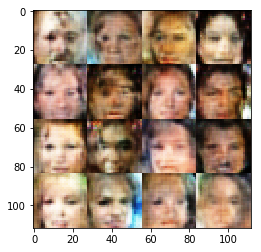

Epoch 1/1... Discriminator Loss: 0.9188... Generator Loss: 1.1609
Epoch 1/1... Discriminator Loss: 1.2670... Generator Loss: 0.4797
Epoch 1/1... Discriminator Loss: 0.8641... Generator Loss: 1.3113
Epoch 1/1... Discriminator Loss: 0.5716... Generator Loss: 1.9858
Epoch 1/1... Discriminator Loss: 0.4810... Generator Loss: 2.6098
Epoch 1/1... Discriminator Loss: 0.9903... Generator Loss: 0.7548
Epoch 1/1... Discriminator Loss: 1.5221... Generator Loss: 0.4130
Epoch 1/1... Discriminator Loss: 0.6379... Generator Loss: 1.0737
Epoch 1/1... Discriminator Loss: 0.8748... Generator Loss: 0.7920
Epoch 1/1... Discriminator Loss: 2.7564... Generator Loss: 2.2996


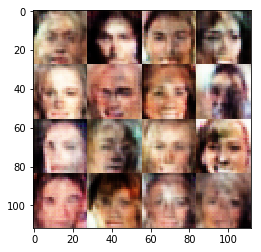

Epoch 1/1... Discriminator Loss: 0.8528... Generator Loss: 1.0676


KeyboardInterrupt: 

In [12]:
batch_size = 100
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.